In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Max\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Подгрузка данных и исследовательский анализ 

In [2]:
df = pd.read_csv("heart.csv")
df. head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Доступные нам характеристики записи:
- age - возраст
- sex - пол
- cp - (chest pain) тип болей в груди
- trtbps - (resting blood pressure) давление в состоянии покоя
- chol - холестерин
- fbs - сахар в крови натощак
- restecg - результат экг в состоянии покоя
- thalachh - пик значения пульса
- exng - (exercise induced angina) наличие ангины
- oldpeak 
- slp 
- caa - количество сосудов, подсвеченных рентгеноскопией
- thall - талассемии 
- output - наличие проблем с сердцем

Сразу заметные статистические факты:
- возраст в датасете от 29 до 77, средний 54
- поп полу выборка достаточно репрезентативна 

Типы данных:
везде целые числа, кроме oldpeak

Пропуски в данных отсутствуют
Всего 303 строки

#### Распределения основных характеристик
Нарисуем распределения основных переменных, а также построим матрицу корреляций

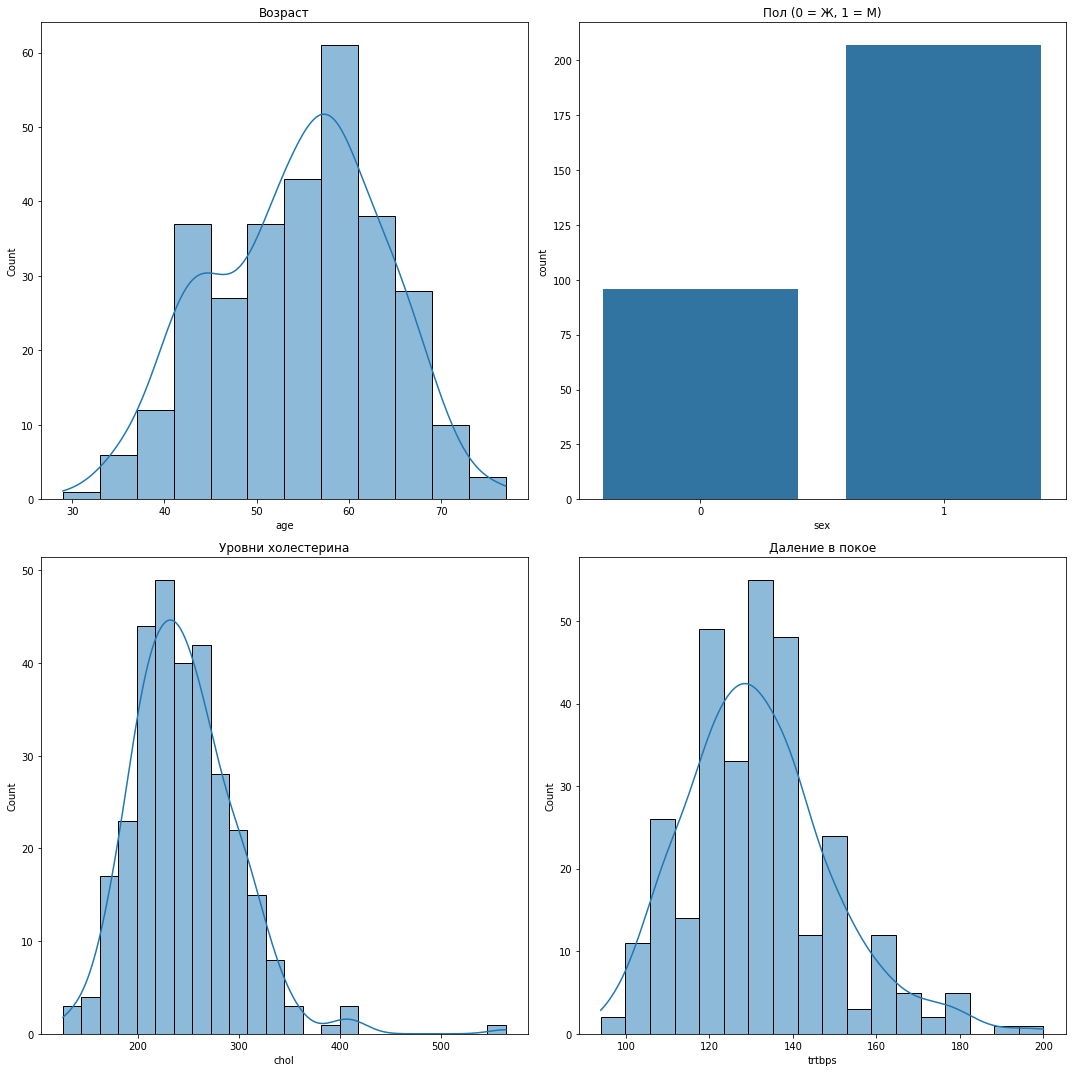

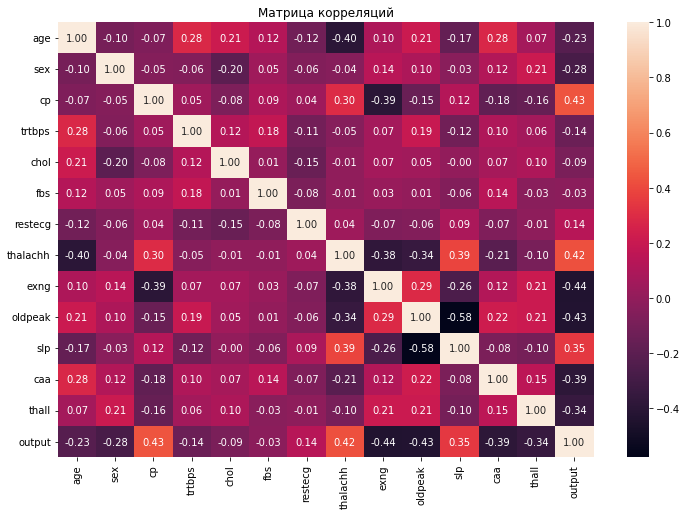

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.histplot(df['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Возраст')

sns.countplot(x='sex', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Пол (0 = Ж, 1 = М)')

sns.histplot(df['chol'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Уровни холестерина')

sns.histplot(df['trtbps'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Даление в покое')

plt.tight_layout()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Матрица корреляций")

plt.show()

Результат построения матрицы корреляций:
- Обнаружена обратно-пропорциональная свзяь возраста и талассемий
- Переменная болей в груди показала явную положительную корреляцию с нацей целевой переменной, что может означать её полезность в качестве предиктора
- exng, oldpeak, caa и thall показали явную отрицательную корреляцию с целевой переменной

#### Распределение целевой переменной

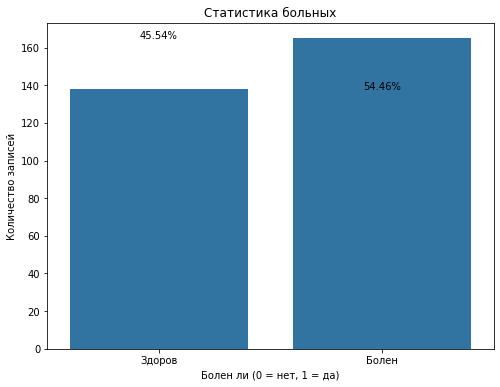

(output
 1    165
 0    138
 Name: count, dtype: int64,
 output
 1    54.455446
 0    45.544554
 Name: count, dtype: float64)

In [8]:
# вычислим количество и процент сердечно больных  
heart_cnt = df['output'].value_counts()
heart_pcnt = heart_cnt / df.shape[0] * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=heart_cnt.index, y=heart_cnt.values)
plt.title("Статистика больных")
plt.xlabel("Болен ли (0 = нет, 1 = да)")
plt.ylabel("Количество записей")
plt.xticks([0, 1], ['Здоров', 'Болен'])

# вывод в процентах
for index, value in enumerate(heart_cnt):
    plt.text(index, value, f'{heart_pcnt[index]:.2f}%', ha='center')

plt.show()

heart_cnt, heart_pcnt

Целевая переменная распределена крайне равномерно, что должно улучшить результат нашего моделирования

Рассмотрим распределение характеристик по целевым классам:

In [9]:
output_yes = df[df['output'] == 1]
output_no = df[df['output'] == 0]

# расчитываем средние значения
metrics = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
comparison_df = pd.DataFrame({
    'metric': metrics,
    'mean_yes': output_yes[metrics].mean(),
    'mean_no': output_no[metrics].mean()
})

comparison_df

,metric,mean_yes,mean_no
age,age,52.496970,56.601449
sex,sex,0.563636,0.826087
cp,cp,1.375758,0.478261
trtbps,trtbps,129.303030,134.398551
chol,chol,242.230303,251.086957
fbs,fbs,0.139394,0.159420
restecg,restecg,0.593939,0.449275
thalachh,thalachh,158.466667,139.101449
exng,exng,0.139394,0.550725
oldpeak,oldpeak,0.583030,1.585507


## Выбор признаков


In [10]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

Optimization terminated successfully.
         Current function value: 0.348904
         Iterations 7


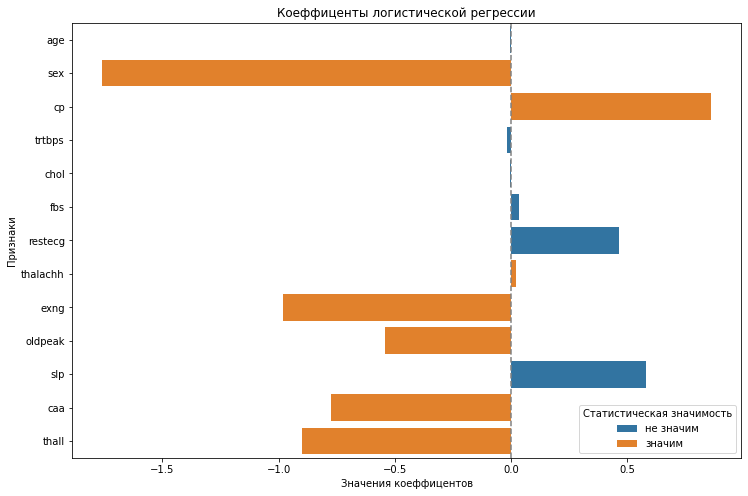

,Признаки,Коеффиценты,P-значения,Значимость
0,age,-0.004908,0.832266,не значим
1,sex,-1.758181,0.000176,значим
2,cp,0.859851,0.000004,значим
3,trtbps,-0.019477,0.059582,не значим
4,chol,-0.004630,0.220873,не значим
5,fbs,0.034888,0.947464,не значим
6,restecg,0.466282,0.180618,не значим
7,thalachh,0.023211,0.026485,значим
8,exng,-0.979981,0.016782,значим
9,oldpeak,-0.540274,0.011523,значим


In [11]:
# подготовка данных к логистической регрессии
X = df.drop('output', axis=1)
y = df['output']

X_const = sm.add_constant(X)

# строим логистическиую регрессию
model = sm.Logit(y, X_const)
result = model.fit()

# достаём коеффиценты и p-значения
coefficients = result.params[1:] 
p_values = result.pvalues[1:] 

# Дальше строим визуализацию
viz_df = pd.DataFrame({
    'Признаки': coefficients.index,
    'Коеффиценты': coefficients.values,
    'P-значения': p_values.values
})

viz_df['Значимость'] = np.where(viz_df['P-значения'] <= 0.05, 'значим', 'не значим')

plt.figure(figsize=(12, 8))
sns.barplot(x='Коеффиценты', y='Признаки', data=viz_df, hue='Значимость', dodge=False)
plt.title('Коеффиценты логистической регрессии')
plt.xlabel('Значения коеффицентов')
plt.ylabel('Признаки')
plt.axvline(x=0, color='grey', linestyle='--')
plt.legend(title='Статистическая значимость', loc='lower right')

plt.show()

viz_df

По итогу визуализации и расчетов P-значений видим, что статистически значимо отличаются только признаки sex, cp, thalachh, exng, oldpeak, caa, thall

## Обработка признаков

In [12]:
# Разобьем возраст на категории
df['age_category'] = pd.cut(df['age'], bins=[0, 30, 45, 60, 120], labels=['<30', '30-45', '46-60', '>60'])

# Добавим составные признаки
df['age_chol'] = df['age'] * df['chol']
df['bp_chol'] = df['trtbps'] * df['chol']

# применим One-hot encoding к возрастной категории
df_encoded = pd.get_dummies(df, columns=['age_category'], drop_first=True)

if not all([dtype in [np.dtype('float64'), np.dtype('int64')] for dtype in df_encoded.dtypes]):
    for col in df_encoded.select_dtypes(include=['object', 'category','bool']).columns:
        df_encoded[col] = pd.to_numeric(df_encoded[col], errors='coerce')

In [13]:
# переведём все двоичные переменные в целочисленные
df_encoded['age_category_30-45'] = df_encoded['age_category_30-45'].astype(int)
df_encoded['age_category_46-60'] = df_encoded['age_category_46-60'].astype(int)
df_encoded['age_category_>60'] = df_encoded['age_category_>60'].astype(int)

# проверим типы
encoded_columns_types = df_encoded[['age_category_30-45', 'age_category_46-60', 'age_category_>60']].dtypes

encoded_columns_types

age_category_30-45    int32
age_category_46-60    int32
age_category_>60      int32
dtype: object

In [14]:
# Подготовим данные с новыми признаками к регрессии
X_new_features_encoded = df_encoded.drop('output', axis=1) 
y = df_encoded['output']

X_const_new_features_encoded = sm.add_constant(X_new_features_encoded)

# строим логистическую регрессию
model_new_features_encoded = sm.Logit(y, X_const_new_features_encoded)
result_new_features_encoded = model_new_features_encoded.fit()

# Получим описание новой модели
logit_summary_new_features_encoded = result_new_features_encoded.summary2()
logit_summary_new_features_encoded

         Current function value: 0.346642
         Iterations: 35


C:\Users\Max\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit               Pseudo R-squared:    0.497     
Dependent Variable:      output              AIC:                 248.0651  
Date:                    2023-12-12 15:38    BIC:                 318.6260  
No. Observations:        303                 Log-Likelihood:      -105.03   
Df Model:                18                  LL-Null:             -208.82   
Df Residuals:            284                 LLR p-value:         3.0492e-34
Converged:               0.0000              Scale:               1.0000    
No. Iterations:          35.0000                                            
----------------------------------------------------------------------------
                    Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
----------------------------------------------------------------------------
const               16.3427 15494.4889  0.0011 0.9992 -30352.2975 30384.9828
age                 -0.0319     0.1065 -0.2995 0.7646     -0.2407     0.1769
sex                 -1.7593     0.4708 -3.7367 0.0002     -2.6822    -0.8365
cp                   0.8523     0.1867  4.5639 0.0000      0.4863     1.2183
trtbps               0.0206     0.0569  0.3615 0.7177     -0.0909     0.1320
chol                 0.0072     0.0366  0.1964 0.8443     -0.0646     0.0789
fbs                  0.0707     0.5310  0.1331 0.8941     -0.9701     1.1114
restecg              0.4568     0.3521  1.2973 0.1945     -0.2333     1.1469
thalachh             0.0227     0.0105  2.1627 0.0306      0.0021     0.0433
exng                -0.9454     0.4101 -2.3055 0.0211     -1.7492    -0.1417
oldpeak             -0.5494     0.2162 -2.5407 0.0111     -0.9733    -0.1256
slp                  0.5931     0.3510  1.6897 0.0911     -0.0949     1.2810
caa                 -0.7950     0.1971 -4.0347 0.0001     -1.1813    -0.4088
thall               -0.8825     0.2921 -3.0214 0.0025     -1.4550    -0.3100
age_chol             0.0001     0.0004  0.3572 0.7209     -0.0007     0.0009
bp_chol             -0.0002     0.0002 -0.7117 0.4766     -0.0006     0.0003
age_category_30-45 -16.0826 15494.4863 -0.0010 0.9992 -30384.7177 30352.5525
age_category_46-60 -16.4747 15494.4863 -0.0011 0.9992 -30385.1098 30352.1605
age_category_>60   -16.3373 15494.4864 -0.0011 0.9992 -30384.9726 30352.2979
============================================================================

"""

Новые признаки:
- age_category - коеффиценты новых возрастных признаков показали не стат. значимое влияние на целевую переменную
- age_chol - новый признак, основанный на возрасте и уровне холестерина не оказался хорошим предиктором
- bp_chol - признак давления в группе с холестерином также оказался не информативным по итогу.

Старые признаки:
Признаки, которые показали себя стат значимыми до добавления новых так и остались полезными для нас.

## Сократим сложность модели

In [15]:
# Оставим только стат значимые переменные
significant = ['sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'caa', 'thall']
X_significant = df_encoded[significant]
X_const_significant = sm.add_constant(X_significant)

# Строим лог регрессию
model_significant = sm.Logit(y, X_const_significant)
result_significant = model_significant.fit()

# Получим описание получившейся модели
logit_summary_significant_predictors = result_significant.summary2()
logit_summary_significant_predictors

Optimization terminated successfully.
         Current function value: 0.368502
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.465     
Dependent Variable: output           AIC:              239.3125  
Date:               2023-12-12 16:04 BIC:              269.0223  
No. Observations:   303              Log-Likelihood:   -111.66   
Df Model:           7                LL-Null:          -208.82   
Df Residuals:       295              LLR p-value:      1.8244e-38
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const          0.4636    1.4816   0.3129  0.7544  -2.4404   3.3675
sex           -1.3896    0.4058  -3.4245  0.0006  -2.1849  -0.5943
cp             0.7872    0.1747   4.5054  0.0000   0.4447   1.1296
thalachh       0.0237    0.0088   2.6851  0.0073   0.0064   0.0409
exng          -1.0447    0.3890  -2.6855  0.0072  -1.8071  -0.2822
oldpeak       -0.7406    0.1824  -4.0609  0.0000  -1.0981  -0.3832
caa           -0.7133    0.1744  -4.0903  0.0000  -1.0552  -0.3715
thall         -0.8963    0.2745  -3.2647  0.0011  -1.4343  -0.3582
=================================================================

"""

Коеффиценты модели хорошо коррелируют с целевой переменной модели.\
Метрика pseudo R-squared равна *0.465*, что означает неплохой предсказательный успех модели.

## Окончательное моделирование

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [17]:
# Разделим датасет на тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X_const_significant, y, test_size=0.3, random_state=69)

# Натренируем модель
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Получим предсказания на тестовой выборке
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

# Посмотрим как наша модель справилась
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

performance_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC-AUC Score": roc_auc
}

performance_metrics

C:\Users\Max\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Accuracy': 0.8351648351648352,
 'Precision': 0.8571428571428571,
 'Recall': 0.84,
 'F1 Score': 0.8484848484848485,
 'ROC-AUC Score': 0.8985365853658537}

The logistic regression model's predictive performance on the test set is as follows:
- Accuracy: 83.52% - Модель правильно предсказала наличие или отсутствие проблем с сердцем в 83.52% случаев тестовой выборки.
- Precision: 85.71% - Из всех положительных предсказаний модели, 85.71% оказались верными.
- Recall: 84.00% - Из всех положительных наблюдений модель верно определила 84.00%.
- F1 Score: 84.85% - Среднее гармоническое precision и recall.
- ROC-AUC Score: 87.41% - Результат по этой метрике крайне близок к 1, что указывает на хорошее умение модели отличать больных от здоровых по выделенным нами признакам